In [1]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.pyplot import cm
scaler = StandardScaler()

In [2]:
path = 'crypto_data/my_dataset_csv.csv'               

my_df = pd.read_csv(path)  
my_df = my_df.dropna()
my_df = my_df.drop('Datetime', 1)

In [3]:
my_df = pd.DataFrame(scaler.fit_transform(my_df),columns = my_df.columns)

In [53]:
my_df.head(30)

,BTC-USD_close,LTC-USD_close,ETH-USD_close,BCH-USD_close
0,-0.963719,-1.049992,-0.941173,-1.119348
1,-0.963978,-1.053079,-0.938261,-1.117393
2,-0.963563,-1.038220,-0.938347,-1.118144
3,-0.962346,-1.054497,-0.932420,-1.114794
4,-0.963704,-1.056933,-0.932084,-1.125582
5,-0.963999,-1.041804,-0.938837,-1.125123
6,-0.964156,-1.051921,-0.953125,-1.136779
7,-0.964795,-1.061406,-0.949800,-1.129064
8,-0.965752,-1.060283,-0.956964,-1.139469
9,-0.965091,-1.065845,-0.951336,-1.136890


In [5]:
my_df.shape

(52645, 4)

In [7]:
def make_dataset_test(data):
    data = np.array(data, dtype=np.float32) # convert data to np.array
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=12,
      sequence_stride=1,
      shuffle=False,
      batch_size=32,)
    # very useful function which converts data to dataset (input_window, label_window) from array

    #ds = ds.map(split_window_test)

    return ds


In [8]:
my_ds = make_dataset_test(my_df[:24])

In [9]:
#my_gru_model = load_model("models_28_11_2020\\lstm_bidi.model")
#my_gru_model = load_model("models_second\\gru_model.model")

loaded_model_nevim = load_model("models_24_11_2020\\lstm.model") #nice results

loaded_model_2 = load_model("models_second\\lstm_bidi.model") # interesting
loaded_model = load_model("models_28_11_2020\\lstm_bidi.model")

loaded_model_single = load_model("models_20_11_2020\\lstm_bidi.model")

loaded_model_single_gru = load_model("models_20_11_2020\\gru_model.model")

In [10]:
loaded_model_should = load_model("models_28_11_2020\\lstm_single.model")

In [11]:
loaded_model_should.name

'sequential_11'

In [12]:
loaded_model_nevim.name

'sequential_15'

In [14]:
def test_models(param_df,points, window_size, *args):

    in_arr = np.array(param_df[:points+window_size])
    in_arr = in_arr[None, :, :]
    in_arr.shape
    actual_price = in_arr[0,:,0]
    
    
    for model in args:
        
        count_dif = 0
        
        for point in range(points):
            in_data = np.array(param_df[point: point+window_size])
            in_data = in_data[None, :, :]
            prediction = model.predict(in_data)
            
            
            if prediction.shape[1] > 1:
                dif = abs(actual_price[window_size+1]) - abs(prediction[0][window_size-1][0])
                print(dif)
                count_dif = count_dif + dif
            else:
                dif = abs(actual_price[window_size+2]) - abs(prediction)
                count_dif = count_dif + dif
    
    
    x = np.arange(len(args))
    print(count_dif)      
    plt.bar(x, count_dif, 0.3)
    plt.ylabel('Scores')
    #plt.xticks(ticks=x, labels=model.name, rotation=45)
    plt.show()  
        

-0.007391736055730069
-0.00705228760373422
-0.006914600874303067
-0.006340786959050382
-0.0063502044929248935
-0.008510813261388028
-0.008878275896428311
-0.00749711706769296
-0.008625373388646329
-0.008082792307255948
-0.005935236955998624
-0.007794484640477384
-0.005332216764805997
-0.005571350599644864
-0.006678626085637296
-0.006505593801854337
-0.005279705072758878
-0.005060121561406339
-0.00299499943387338
-0.002263829256413663
-0.0016950817359668857
0.0022090821014659756
0.003810718511225497
0.007932320092798983
0.006258562062861239
0.007222607587458407
0.012023463700892245
0.010212614987971103
0.009695365880610263
0.011278107617975985
0.010255649541498935
0.010422721360804355
0.011090114568354403
0.012045815442683017
0.011196151231409823
0.011562004541041171
0.009516492341639315
0.011598184560419833
0.016856327508570468
0.024392917607905185
0.054424658273340976
0.05381412789690665
0.06376118943560294
0.06780649707186392
0.0674977450119274
0.06916053578722647
0.07471771523821524

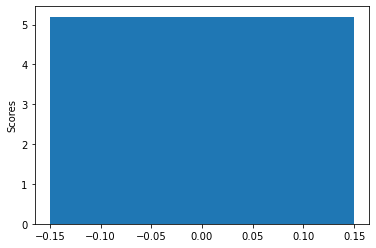

In [17]:
test_models(my_df,100, 24, loaded_model)

In [18]:
def compare_models(param_df,points, window_size, *args):

    in_arr = np.array(param_df[:points+window_size]) 
    in_arr = in_arr[None, :, :]
    actual_price = in_arr[0,:,0] # get actual price of desired column
    
    # Plot
    x_axis = np.arange(points+window_size) # axis for graph
    
    plt.figure(figsize=(20,20))
    plt.plot(x_axis, actual_price, label='Inputs', marker='.', zorder=-10)
    plt.scatter(x_axis,actual_price, edgecolors='k', label='Labels', c='#2ca02c', s=64)
    
    color=iter(cm.rainbow(np.linspace(0,1,len(args))))
    
    for model in args:
        
        predictions = []
        
        for point in range(points):
            in_data = np.array(param_df[point: point+window_size])
            in_data = in_data[None, :, :]

            prediction = model.predict(in_data)
            
            # handle single and multi prediction models
            
            if prediction.shape[1] > 1:
                predictions.append(prediction[0][window_size-1][0])
            else:
                predictions.append(prediction)
            
        c=next(color)
        x_axis_predictions = np.arange(points)+window_size+1
        plt.scatter(x_axis_predictions,predictions, marker='x', edgecolors='k', label=model.name, c=c.reshape(1,-1), s=64)

        
    plt.vlines(x=x_axis, ymin=-0.98, ymax=-0.84, colors='green', ls=':', lw=0.5)
    plt.legend()
    plt.show()
    

In [137]:
def simulate_balance(param_df, points, window_size, *args):

    in_arr = np.array(param_df[:points+window_size])
    in_arr = in_arr[None, :, :]
    actual_price_arr = in_arr[0,:,0]
    
    for model in args:
        
        predictions = []
        balance = 0
        
        for point in range(points-2):
            
            in_data = np.array(param_df[point: point+window_size])
            
            in_data = in_data[None, :, :]
            
            actual_price = actual_price_arr[point+window_size]
            actual_price_pred = actual_price_arr[point+window_size+2]
            #print(actual_price)
            #print(actual_price_pred)

            prediction = model.predict(in_data)
            
            pred_num = 0
            
            if prediction.shape[1] > 1:
                pred_num = prediction[0][window_size-1][0]
            else:
                pred_num = prediction
                
            #print(pred_num)
                
            if actual_price < pred_num:
                dif_up = actual_price_pred - actual_price
                #print(dif_up)
                balance = balance + dif_up
                #balance = balance - actual_price*0.01

            elif actual_price > pred_num:  
                dif_down = actual_price - actual_price_pred
                #print(dif_down)
                balance = balance + dif_down 
                #balance = balance - actual_price*0.01
            else:
                continue
                
            #print(balance)
            balance = balance #- abs(actual_price*0.00075)    
            #print(abs(actual_price*0.00075))
            #print(balance)

            #print("current balance " + str(balance))
        
        print("Final balance " + str(balance))
            
            


In [139]:
simulate_balance(my_df,15000, 24, loaded_model, loaded_model_single, loaded_model_2, loaded_model_nevim,loaded_model_should, loaded_model_single_gru)

Final balance 0.48233701006176
Final balance 0.030615940651344986
Final balance -0.6314438445859691
Final balance 1.207858302419699
Final balance 2.7743510731723773
Final balance 0.7774038056242604


In [34]:


x_real = [0.82, 0.83, 0.89, 0.78]
x_pred = [0.81, 0.81, 0.85, 0.83]

x_last_known = [0.79, 0.8, 0.82, 0.83]

balance = 0

for i in range(4):
    
    if x_last_known[i] < x_pred[i]:
        dif_up = x_real[i] - x_last_known[i]
        print(dif_up)
        balance = balance + dif_up
    
    elif x_last_known[i] > x_pred[i]:  
        dif_down = x_last_known[i] - x_real[i]
        print(dif_up)
        balance = balance + dif_up
    else:
        continue
        
print("Final balance:" + str(balance))


0.82
0.029999999999999916
0.83
0.029999999999999916
0.89
0.07000000000000006
0.78
Final balance:0.1299999999999999


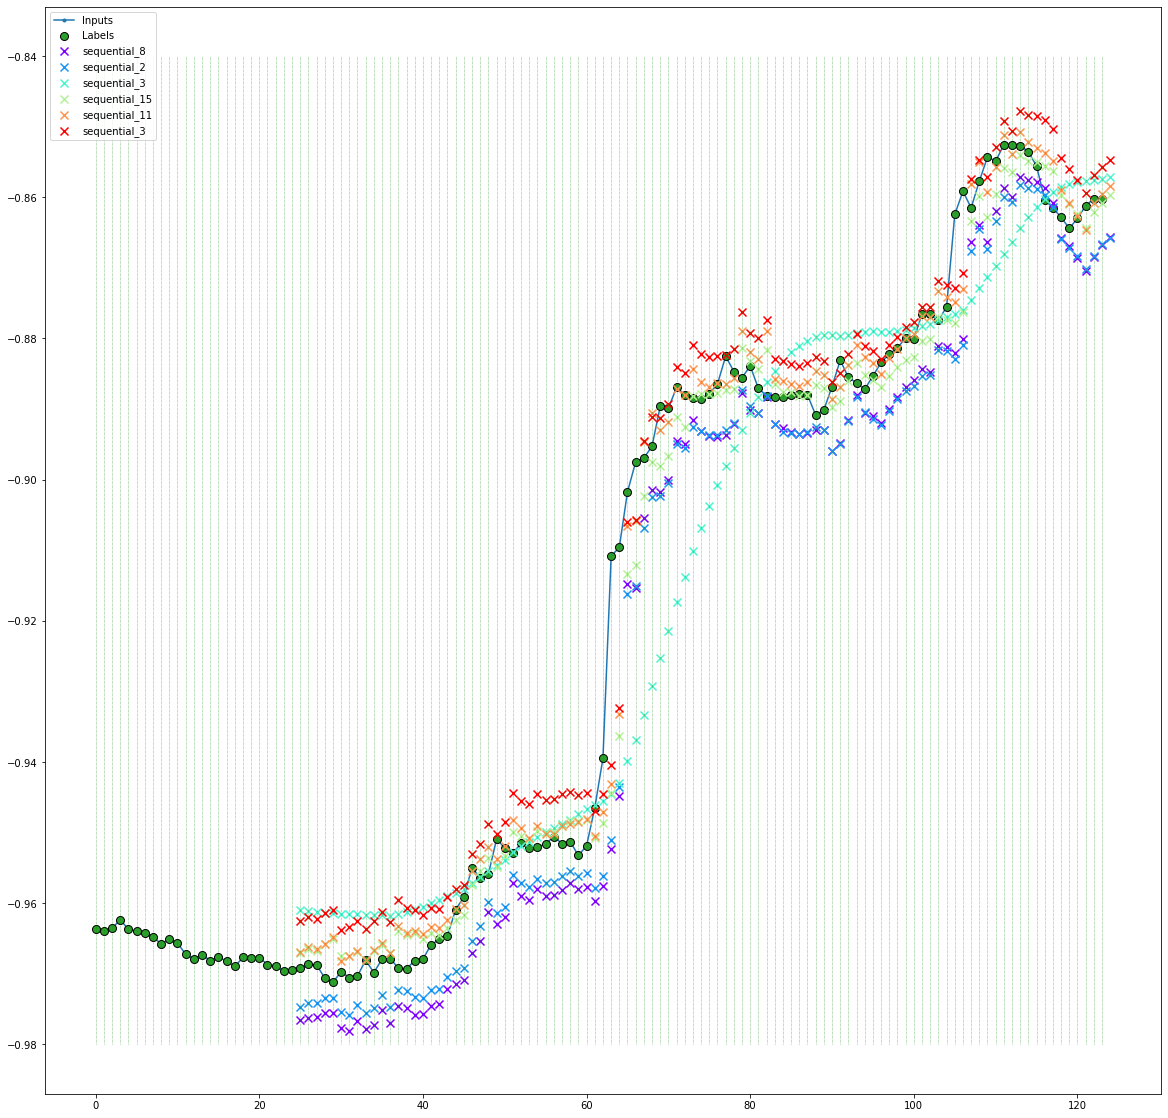

In [19]:
compare_models(my_df,100, 24, loaded_model, loaded_model_single, loaded_model_2, loaded_model_nevim,loaded_model_should, loaded_model_single_gru)

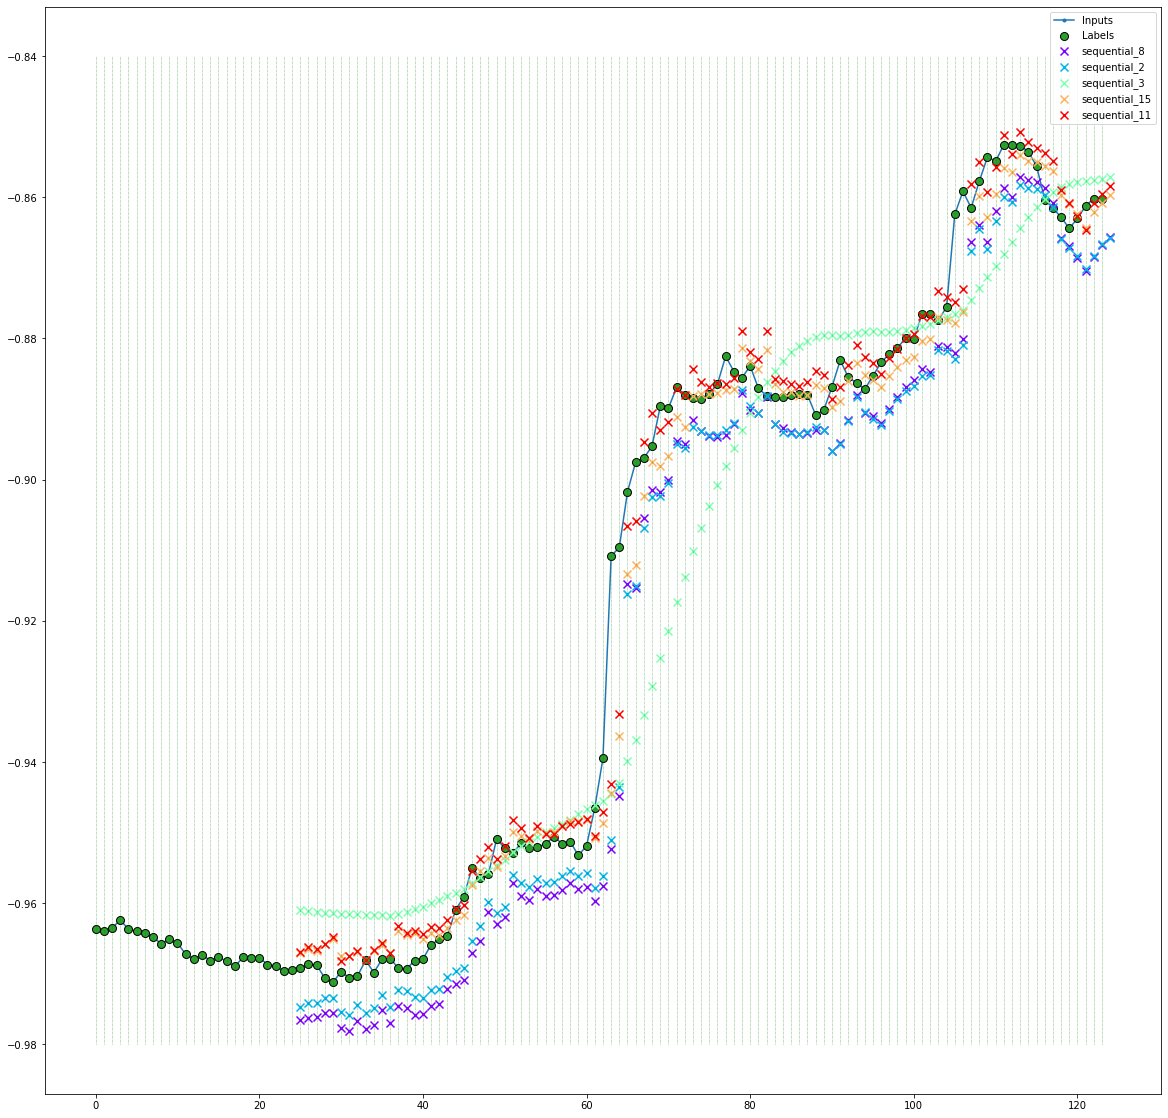

In [20]:
compare_models(my_df,100, 24, loaded_model, loaded_model_single, loaded_model_2, loaded_model_nevim,loaded_model_should)

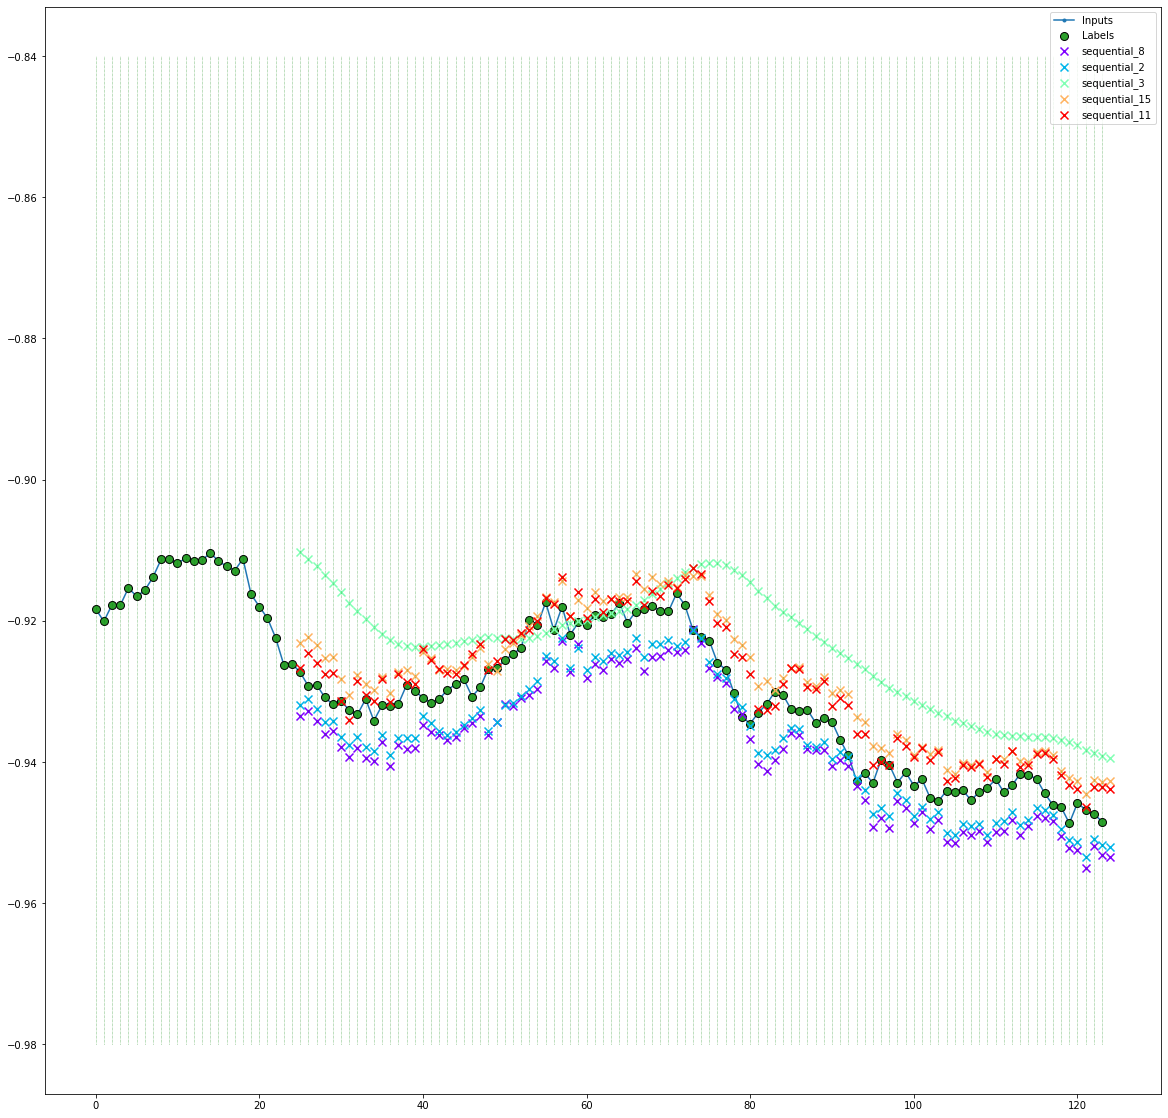

In [21]:
compare_models(my_df[3000:],100, 24, loaded_model, loaded_model_single, loaded_model_2, loaded_model_nevim,loaded_model_should)

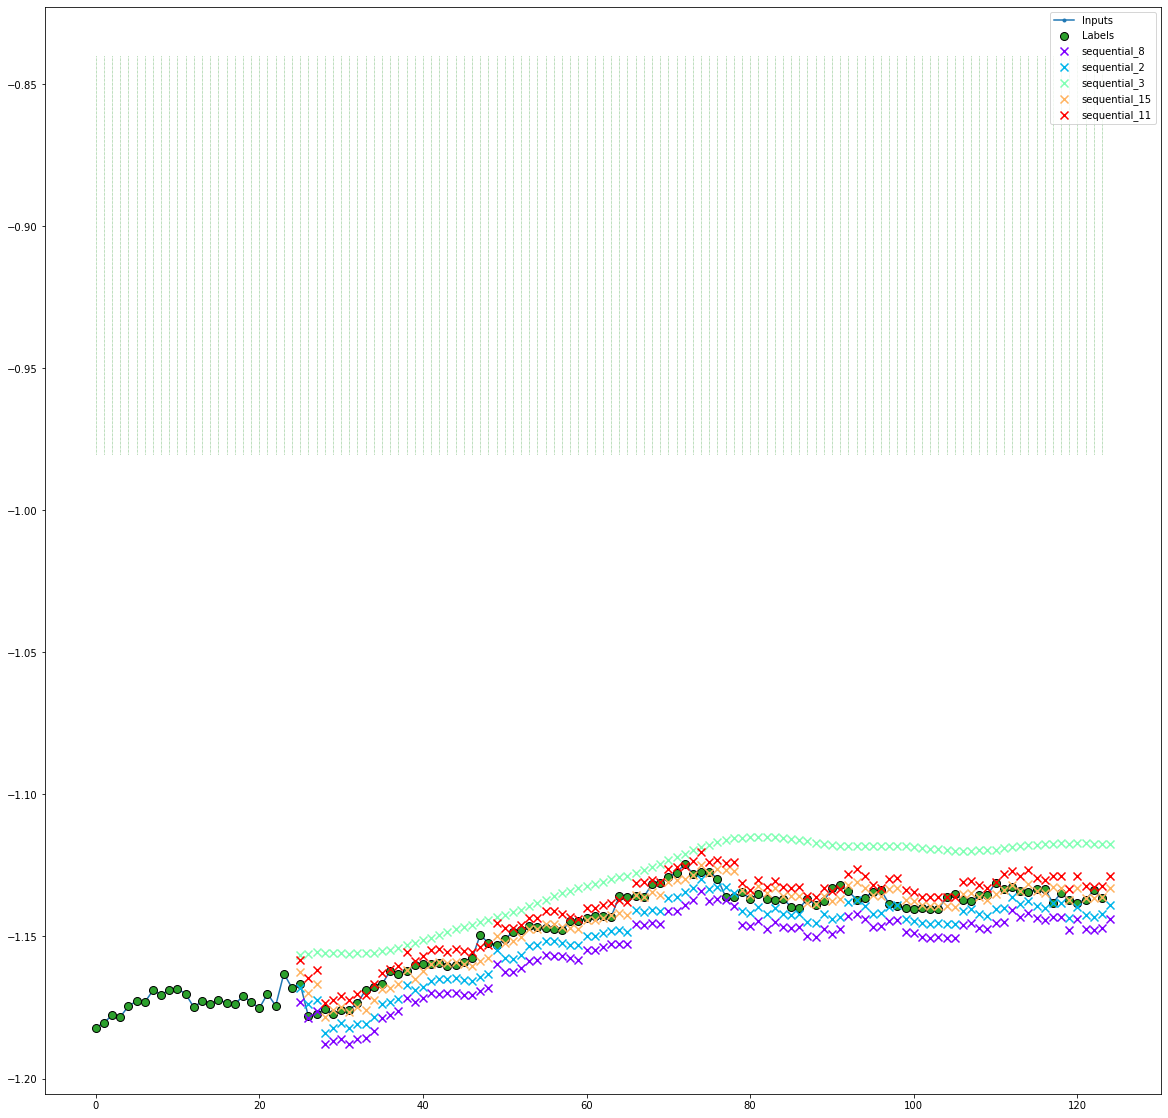

In [22]:
compare_models(my_df[6000:],100, 24, loaded_model, loaded_model_single, loaded_model_2, loaded_model_nevim,loaded_model_should)